In [ ]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import simpy
import random
from scipy.stats import uniform
from random import expovariate
from scipy import stats
NUM_CARRILES = 3
Cant_clientes_aprobados = 0
Cant_clientes_reprobados = 0
TIEMPO_SIMULACION = 25200 # 30 dias divido para 8
aprobados = []
cant_vehi = []

class REVISION_VEHICULAR(object):


  def __init__(self, environment, num_carriles,Cant_clientes_aprobados,Cant_clientes_reprobados):
    # Guardamos como variable el entorno de ejecucion
    self.env=environment
    # Creamos el recurso que representa los cajeros
    self.clientes = simpy.Resource(environment, num_carriles)


  def parquear(self, cliente, num):
    tipo = ''
    if(num == 1):
      tipo = ' Liviano'
    else:
      tipo = ' Pesado'
    print(f'El cliente {cliente} {tipo} comienza a parquearse a las {env.now}')
    yield self.env.timeout(random.uniform(3.0, 5.0))
    print(f'El cliente {cliente} {tipo} termina de parquearse a las {env.now}')

  def sacar_turno(self, cliente, num):
    tipo = ''
    if(num == 1):
      tipo = ' Liviano'
    else:
      tipo = ' Pesado'
    print(f'El cliente {cliente} {tipo} comienza a sacar turno a las {env.now}')
    yield self.env.timeout(random.uniform(1.0, 3.0))
    print(f'El cliente {cliente} {tipo} termina de sacar turno a las {env.now}')
  
  def paga_matricula(self, cliente, num):
    tipo = ''
    if(num == 1):
      tipo = ' Liviano'
    else:
      tipo = ' Pesado'

    print(f'El cliente {cliente} {tipo} comienza a pagar la matricula a las {env.now}')
    yield self.env.timeout(random.uniform(5.0, 10.0))
    print(f'El cliente {cliente} {tipo} termina de pagar la matricula a las {env.now}')

  def pegar_sello(self, cliente, num):
    tipo = ''
    if(num == 1):
      tipo = ' Liviano'
    else:
      tipo = ' Pesado'
    
    print(f'El cliente {cliente} {tipo} comienza a pegar el sello a las {env.now}')
    yield self.env.timeout(random.uniform(1.0, 3.0))
    print(f'El cliente {cliente} {tipo} termina de pegar el sello a las {env.now}')

  def salir(self, cliente, num):

    tipo = ''
    if(num == 1):
      tipo = ' Liviano'
    else:
      tipo = ' Pesado'

    print(f'El cliente {cliente} {tipo} comienza a salir a las {env.now}')
    yield self.env.timeout(random.uniform(0.0, 5.0))
    print(f'El cliente {cliente} {tipo} termina de salir a las {env.now}')
    

  def revision(self, cliente, Cant_clientes_aprobados,Cant_clientes_reprobados, num):
    tipo = ''
    if(num == 1):
      tipo = ' Liviano'
    else:
      tipo = ' Pesado'


    print(f'El cliente {cliente} {tipo} comienza a ser revisado en el carril {tipo} a las {env.now}')
    yield self.env.timeout(random.uniform(10.0, 20.0))
    #Calculamos la probabilidad de que este apruebe la revision
    #60% de que apruebe
    #40% de que no
    print(f'El cliente {cliente}  {tipo}termina de ser revisado a las {env.now}')



def llegada_cliente(env, nombre, revision_vehi, Cant_clientes_aprobados,Cant_clientes_reprobados):
  global aprobados
  global cant_vehi
  num=0
  if(random.uniform(0.0, 100.0)<=70.0):
    num = 1 #1 es liviano
  else:
    num = 0 #0 es mediano
  tipo = ''
  if(num == 1):
    tipo = ' Liviano'
    cant_vehi.append(1)
  else:
    tipo = ' Pesado'
    cant_vehi.append(0)
  print(f'El cliente {nombre} {tipo} llega a las {env.now}')
  # Que va a hacer el cliente en la simu
  with revision_vehi.clientes.request() as cliente:
    # Se parquea primero
    yield cliente
    yield env.process(revision_vehi.parquear(nombre, num))
    # Saca turno
    yield cliente
    yield env.process(revision_vehi.sacar_turno(nombre, num))
    # Paga Matricula
    yield cliente
    yield env.process(revision_vehi.paga_matricula(nombre, num))
    if(random.uniform(0.0, 100.0)<=60.0):
      print(f'El cliente {nombre} {tipo} Es aprobado la revision!')
      aprobados.append(1)
    else:
      print(f'El cliente {nombre} {tipo} No aprobo la revision!')
      aprobados.append(0)
    # Revision
    yield cliente
    yield env.process(revision_vehi.revision(nombre, Cant_clientes_aprobados,Cant_clientes_reprobados, num))
    # pegar sello
    yield cliente
    yield env.process(revision_vehi.pegar_sello(nombre, num))
    # salir
    yield cliente
    yield env.process(revision_vehi.salir(nombre, num))


def ejecutar_simulacion(env, num_cajeros, Cant_clientes_aprobados,Cant_clientes_reprobados):
  revision_vehi=REVISION_VEHICULAR(env, num_cajeros, Cant_clientes_aprobados,Cant_clientes_reprobados)
  # Creamos los 3 carriles
  for i in range(NUM_CARRILES):
    env.process(llegada_cliente(env, 'Cliente%d'%(i+1),revision_vehi, Cant_clientes_aprobados,Cant_clientes_reprobados))
  # Ejecutamos la simulacion
  while True:
    # Cada 3 minutos llega un nuevo vehiculo a revision
    yield env.timeout(uniform.rvs(1,3,size=1)[0])
    i+=1
    # Atiendo a los clientes
    env.process(llegada_cliente(env,'Cliente-%d'%(i+1),revision_vehi, Cant_clientes_aprobados,Cant_clientes_reprobados))
     # Terminamos despues de 100 clientes
    if i == 100:
      break
  


# Inicializamos la semilla aleatoria
random.seed(77)
# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_CARRILES,Cant_clientes_aprobados,Cant_clientes_reprobados))
# Ejecutamos el proceso
env.run(until=TIEMPO_SIMULACION)


El cliente Cliente1  Pesado llega a las 0
El cliente Cliente2  Liviano llega a las 0
El cliente Cliente3  Liviano llega a las 0
El cliente Cliente1  Pesado comienza a parquearse a las 0
El cliente Cliente2  Liviano comienza a parquearse a las 0
El cliente Cliente3  Liviano comienza a parquearse a las 0
El cliente Cliente-4  Liviano llega a las 2.412629953444213
El cliente Cliente2  Liviano termina de parquearse a las 3.230125073974207
El cliente Cliente2  Liviano comienza a sacar turno a las 3.230125073974207
El cliente Cliente3  Liviano termina de parquearse a las 3.9524735503352213
El cliente Cliente3  Liviano comienza a sacar turno a las 3.9524735503352213
El cliente Cliente-5  Liviano llega a las 4.238290920016081
El cliente Cliente1  Pesado termina de parquearse a las 4.645111738736363
El cliente Cliente1  Pesado comienza a sacar turno a las 4.645111738736363
El cliente Cliente3  Liviano termina de sacar turno a las 5.243416480853176
El cliente Cliente3  Liviano comienza a pagar l

Cantidad de usuarios Aprobados = 64
Cantidad de usuarios Reprobados = 37


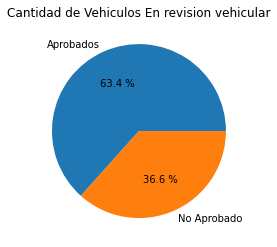

In [ ]:
import matplotlib.pyplot as plt
vaprob = aprobados.count(1)
vreprob = aprobados.count(0)


print('Cantidad de usuarios Aprobados = '+str(vaprob))
print('Cantidad de usuarios Reprobados = '+str(vreprob))

data = [vaprob,vreprob]
nombres = ["Aprobados","No Aprobado"]
plt.pie(data, labels=nombres,autopct="%0.1f %%")
plt.title("Cantidad de Vehiculos En revision vehicular")
plt.show()

Cantidad de usuarios Livianos = 71
Cantidad de usuarios Pesados = 30


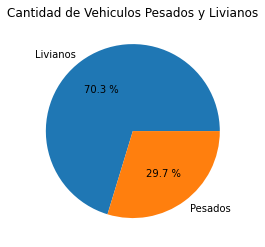

In [ ]:
import matplotlib.pyplot as plt
vLivi = cant_vehi.count(1)
vPesa = cant_vehi.count(0)


print('Cantidad de usuarios Livianos = '+str(vLivi))
print('Cantidad de usuarios Pesados = '+str(vPesa))

data = [vLivi,vPesa]
nombres = ["Livianos","Pesados"]
plt.pie(data, labels=nombres,autopct="%0.1f %%")
plt.title("Cantidad de Vehiculos Pesados y Livianos")
plt.show()